In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data 

In [4]:
from gapminder import gapminder

**Explore the dataset**

In [2]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 66.6+ KB
None


In [5]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [7]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [26]:
gapminder.country.nunique()

142

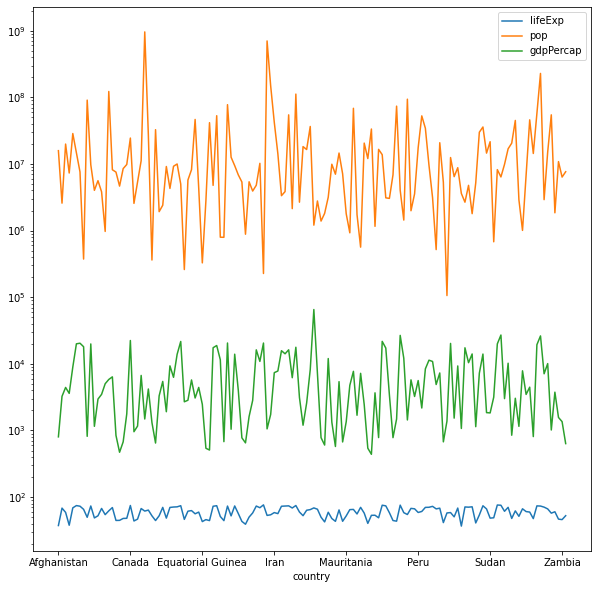

In [27]:
gapminder.drop(['year'], axis=1).groupby('country').mean().plot(logy=True, figsize=(10,10))

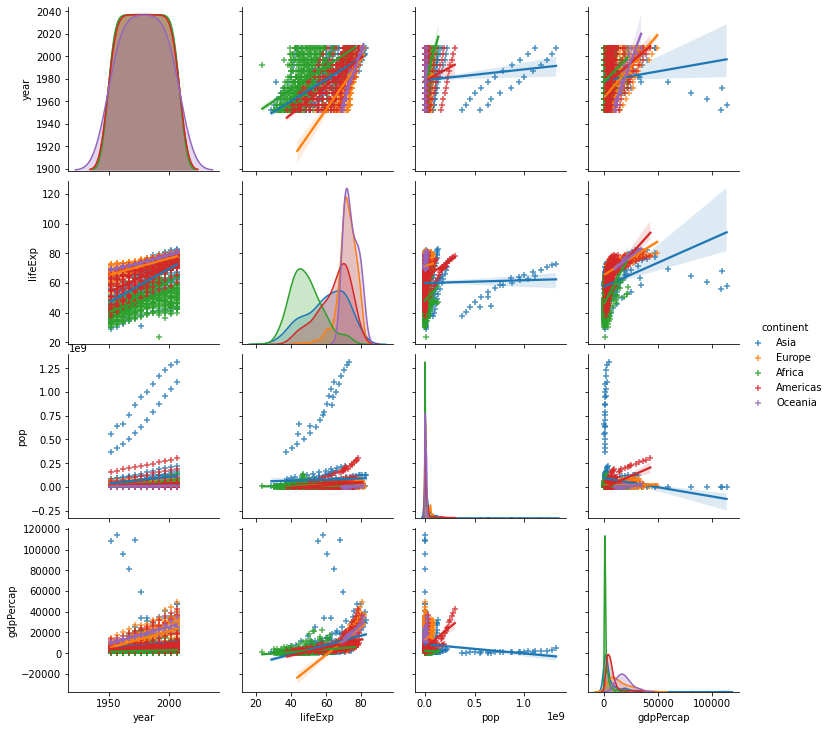

In [78]:
import seaborn as sns 
sns.pairplot(gapminder, hue='continent', kind='reg', markers="+")

**Predictor** and **Target** Variables

In [80]:
y = df['lifeExp'].values
X = df['gdpPercap'].values 

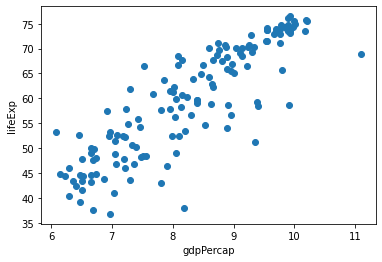

In [82]:
plt.scatter(np.log(X), y)
plt.xlabel('gdpPercap')
plt.ylabel('lifeExp')
plt.show()

# Find correlation between the feature and target variable

In [83]:
print(stats.pearsonr(np.log(X), y))

(0.8630745763052319, 2.2962239447579392e-43)


Clearly a linear relationship

Reshape X because a 2D array is expected

In [84]:
X = X.reshape(-1, 1)

# Create training and test sets

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

Create the regressor: reg_all

In [86]:
reg_all = LinearRegression()

Fit the regressor to the training data

In [87]:
reg_all.fit(X_train, y_train)    

LinearRegression()

Predict on the test data: y_pred

In [88]:
y_pred = reg_all.predict(X_test)

Compute and print **R^2** and **RMSE**

In [89]:
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.47846906248440757
Root Mean Squared Error: 8.483090740603199


Compute 5-fold **cross-validation scores**: cv_scores

In [90]:
cv_scores = cross_val_score(reg_all, X, y, cv=5)

Print the 5-fold cross-validation scores

In [91]:
cv_scores

array([ 0.48432595,  0.56155224, -0.89487282,  0.48396118,  0.57798506])

In [92]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.24259032045120676


# Regularization I : Lasso

In [93]:
from sklearn.linear_model import Lasso

Instantiate a lasso regressor: lasso

In [94]:
lasso = Lasso(alpha=0.4, normalize=True)

Fit the regressor to the data    

In [95]:
lasso.fit(X, y)

Lasso(alpha=0.4, normalize=True)

Compute and print the coefficients

In [96]:
lasso_coef = lasso.coef_
lasso_coef

array([0.00032255])

Reshape in order to plot :

In [97]:
ar = [0, 0, 0, lasso_coef]
lasso_coef = lasso_coef * ar

**Plot the coefficients**

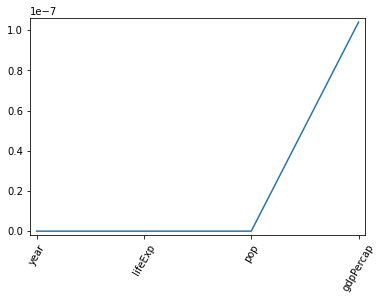

In [98]:
plt.plot(range(len(df.columns)), lasso_coef)
plt.xticks(range(len(df.columns)), df.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

# Regularization II: Ridge 

We define the plot function 

In [101]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [102]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

Setup the array of **alphas** and lists to store **scores**

In [104]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

Create a ridge regressor: ridge

In [105]:
ridge = Ridge(normalize=True)

Compute scores over range of alphas

In [106]:
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))


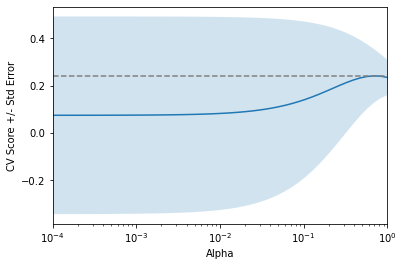

In [107]:
display_plot(ridge_scores, ridge_scores_std)